# Data Analysis

## Histogram of Labels

How frequently do the labels appear in our training set 

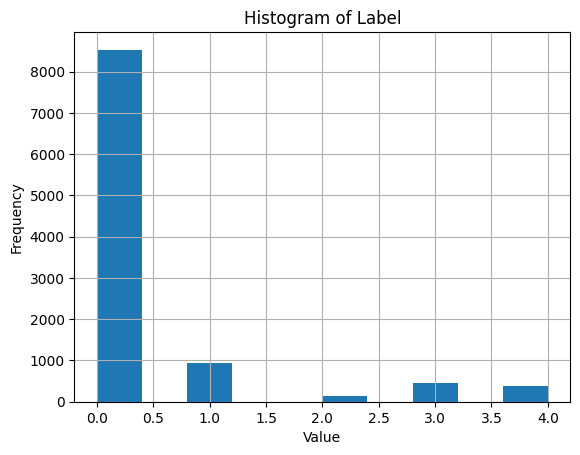

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "./train_data/dontpatronizeme_pcl.tsv"
df = pd.read_csv(file_path, sep='\t', header=None, names=['paragraph-id', 'keyword', 'countrycode', "paragraph", "label"])
df_filtered = df[df['paragraph'].notna()]

df_filtered['label'].hist()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Label')
plt.show()

# Average Paragraph Length / Label

How long are the paragrpahs split by label?

In [14]:
df_filtered['paragraph_length'] = df_filtered['paragraph'].apply(lambda x: len(x.split()))
df_filtered['paragraph_char_length'] = df_filtered['paragraph'].apply(len)

# Group by the 'label' column
grouped = df_filtered.groupby('label')

aggregated_data = grouped.agg({
    'paragraph_length': ['mean', 'count'],  # Getting both mean and count
    'paragraph_char_length': 'mean'  # Getting mean character length
}).reset_index()

# The resulting aggregated_data will have a multi-level column structure. Flatten this structure and rename columns appropriately.
aggregated_data.columns = ['Label', 'Average Paragraph Length', 'Count', 'Average Char Length']


print(aggregated_data)

   Label  Average Paragraph Length  Count  Average Char Length
0      0                 47.423546   8528           262.337242
1      1                 52.019007    947           282.818374
2      2                 49.104167    144           269.270833
3      3                 51.556769    458           277.375546
4      4                 57.700767    391           304.953964


/var/folders/vg/74v_v08n4wxftghd_jwkbqt40000gn/T/ipykernel_29403/3040069976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['paragraph_length'] = df_filtered['paragraph'].apply(lambda x: len(x.split()))
/var/folders/vg/74v_v08n4wxftghd_jwkbqt40000gn/T/ipykernel_29403/3040069976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['paragraph_char_length'] = df_filtered['paragraph'].apply(len)


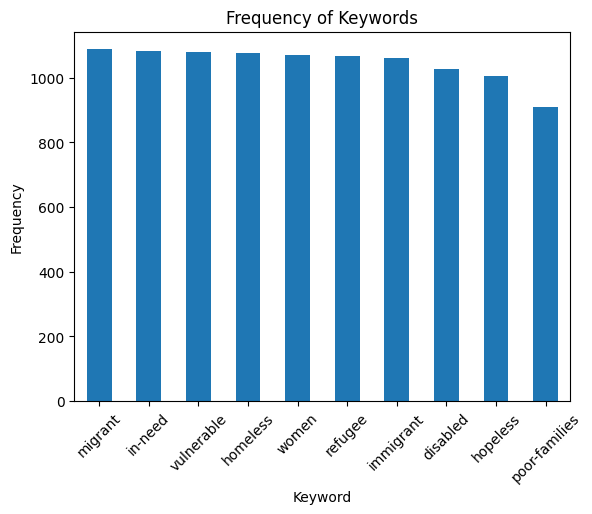

In [4]:
# Plotting keyword frequency
keyword_counts = df_filtered['keyword'].value_counts()
keyword_counts.plot(kind='bar')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords')
plt.xticks(rotation=45)
plt.show()

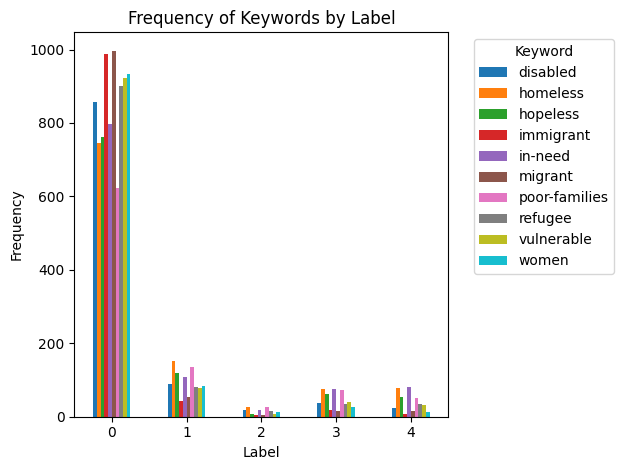

In [18]:

grouped = df_filtered.groupby('label')['keyword'].value_counts().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords by Label')
plt.xticks(rotation=0)
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

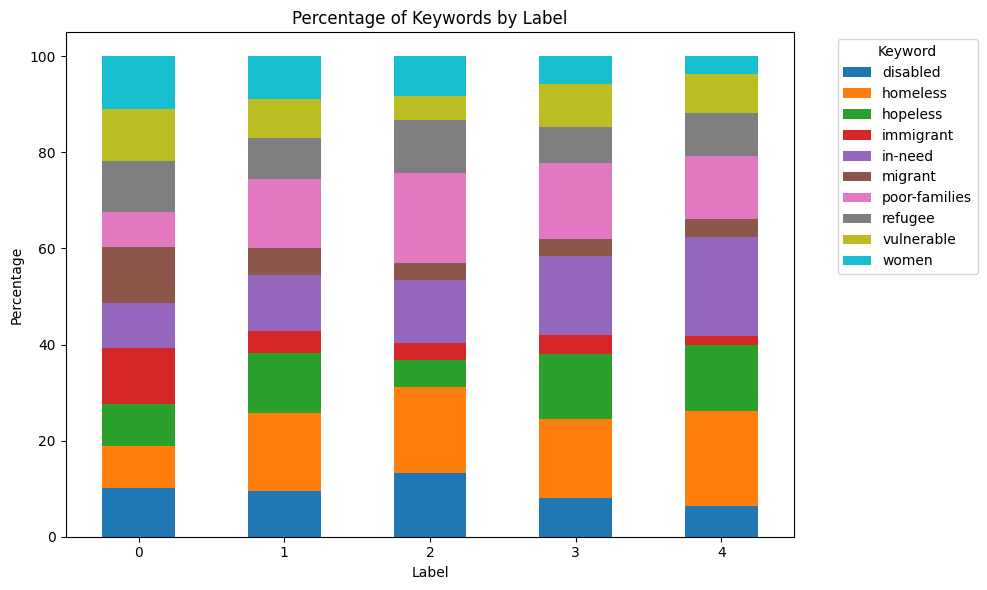

In [19]:
keyword_counts = df_filtered.groupby(['label', 'keyword']).size().unstack(fill_value=0)

# Then, convert these counts to percentages of the total for each label
keyword_percentages = keyword_counts.div(keyword_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
keyword_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.title('Percentage of Keywords by Label')
plt.xticks(rotation=0)
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()